### <p style="font-family: Calibri; font-size:1.4em;color:black;">Meet Vansjaliya</p>


## <p style="font-family: Calibri; font-size:1.4em;color:black;">Task 1</p>

## <p style="font-family: Calibri; font-size:1.4em;color:black;">GRIP-The Sparks Foundation</p>

<p style="font-family: Arial; font-size:1.4em;color:black;"> This is a prediction using supervised Machine learning  </p>
<p style="font-family: Arial; font-size:1.4em;color:black;"> Predict the percentage of an student based on the number of study hours. </p>
<p style="font-family: Arial; font-size:1.4em;color:black;"> This is a simple linear regression task as it involves just 2 variables. </p>
<p style="font-family: Arial; font-size:1.4em;color:black;"> What will be predicted score if a student studies for 9.25 hrs/ day? </p>


# Importing all the required libraries 

In [1]:
#importing all the libraries required 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#display the max column in the dataset
pd.set_option('display.max_columns', 100)

# Reading and undestanding the Data

In [2]:
# reading the dataset
df=pd.read_csv("studentpredict.csv")

In [3]:
#checking the first few rows
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking the shape of the dataset
df.shape

(25, 2)

In [5]:
#checking the dataset from statistical point of view 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking the datatypes of the dataset
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualizing the data

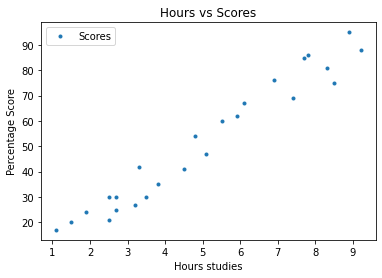

In [38]:
#visualizing the hours vs scores data
df.plot(x='Hours', y='Scores',style='.')
plt.title('Hours vs Scores')
plt.xlabel('Hours studies')
plt.ylabel('Percentage Score')
plt.show()

- We can se the number of hours as increases the students tend to get good or high scores . The hours and the score are linearly related to each other .

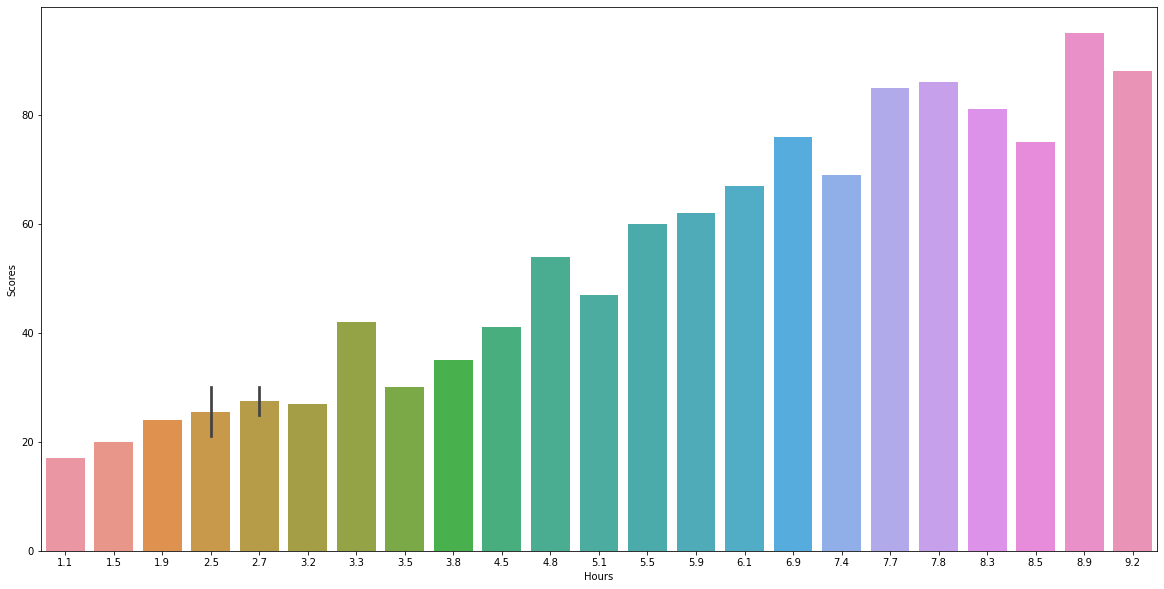

In [12]:
#plot the barplot 
plt.figure(figsize=(20,10))
sns.barplot(x="Hours",y="Scores",data=df)
plt.show()

- Higher the hours spent the scores are good in number 

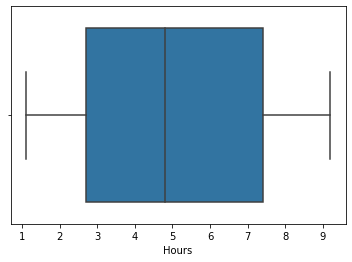

In [13]:
#checking the hours through visualization
sns.boxplot(x="Hours",data=df)
plt.show()

- We notice that there is no outliers 

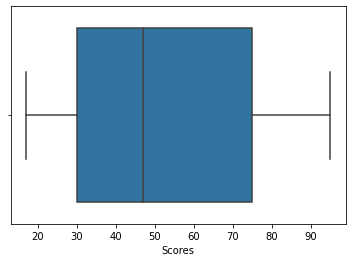

In [14]:
#checking the hours through visualization
sns.boxplot(x="Scores",data=df)
plt.show()

- we notice that tere is no outliers 

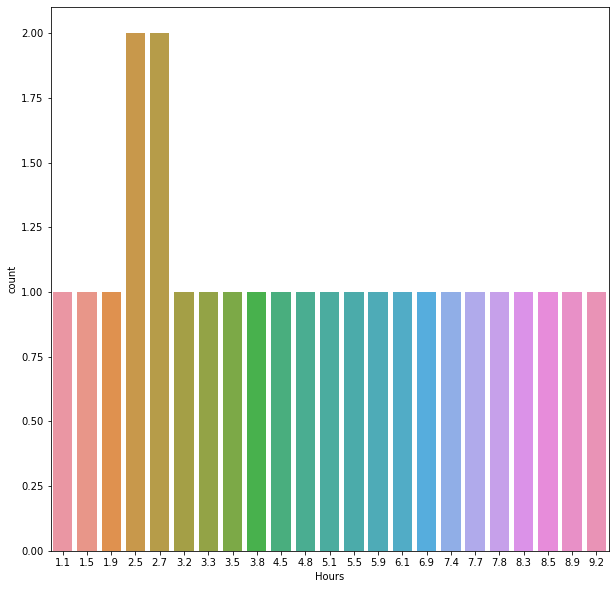

In [15]:
#plot the hours variable
plt.figure(figsize=(10,10))
sns.countplot(x="Hours",data=df)
plt.show()

- highly time spent is the 2.5 to 2.7 hours 

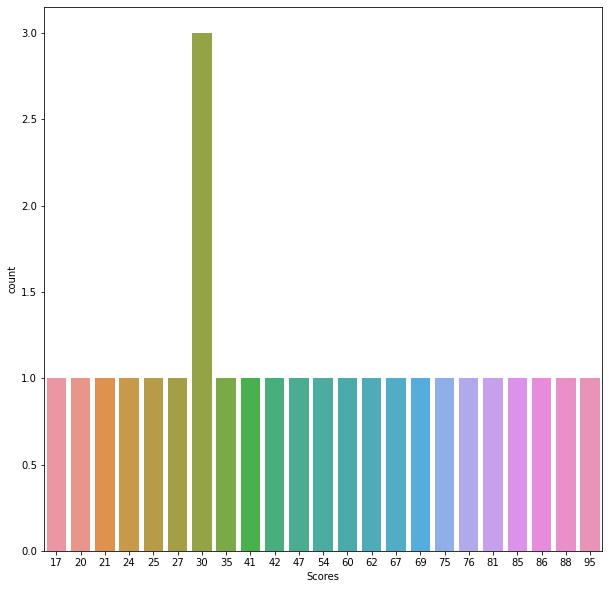

In [16]:
#checking the scores dataset
plt.figure(figsize=(10,10))
sns.countplot(x="Scores",data=df)
plt.show()

- Mostly students falling in the score of 30.

# Preparing the Data 

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [17]:
#Dividing the data features  into X,y variables 
X = df.iloc[:,:1]
y = df.iloc[:,1]

### Train-Test Split



You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [22]:
#imported the sklearn library train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


#### Let's now take a look at the train dataset

In [24]:
X_train.head()

,Hours
6,9.2
12,4.5
4,3.5
24,7.8
0,2.5


In [25]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lm.intercept_)
print(lm.coef_)

1.495142109236383
[9.87171443]


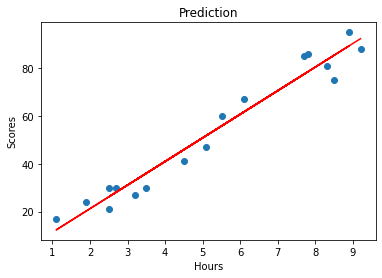

In [28]:
#plotting the best fit line 
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.495142109236383 + 9.87171443*X_train, 'r')
plt.title("Prediction")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### Predictions on the Test Set

In [29]:

# Predict the y values corresponding to X_test_sm
y_pred = lm.predict(X_test)

In [30]:
print(y_pred)

[28.14877107 39.00765694 34.07179972 59.73825724 16.30271375 74.54582888
 69.60997167 48.87937137]


In [31]:
#comparing the actual versus predicted 
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


##### Visualizing the fit on the test set

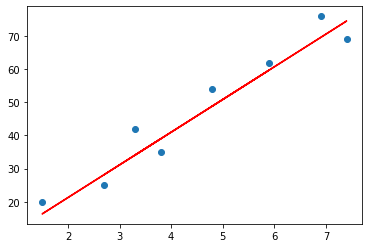

In [32]:
#plotting the best fit line for the test dataset 
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.495142109236383 + 9.87171443 * X_test, 'r')
plt.show()

#### Predicting the score for the study hour 9.25

In [33]:
#printing the predicted score
pred_score = lm.predict([[9.25]])
print("The predicted score is :",pred_score)

The predicted score is : [92.80850057]



<p style= "background:black"> &#9654; <font color ="blue"> <b> NOTE: </b> The predicted score is <b> 92.80</b> </p>


### Evaluation 

In [34]:
#importing the evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

##### Looking at the RMSE

In [35]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.0673878451608445

- RMSE is a good measure of how accurately the model predicts the response and it is the most important criteria for the fit if the main purpose of the model is prediction.
- The closer the value of RMSE to 0 the better the model . Here the value is 5.06 which is quite decent.

###### Checking the R-squared on the test set

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687437

###### checking the mean absolute error

- The R-squared is the goodness of the model.
- The R-squared is the percentage of the dependent variable variation that a linear model explains and as seen its 93% of the dependent variable variation that a linear model explains.

In [37]:
mean_absolute_error(y_test, y_pred)

4.762517892332275

- MAE is the absolute average distance between the real data and the predicted data.